In [1]:
from autumn.tools.project import get_project, ParameterSet
from matplotlib import pyplot as plt
from autumn.tools.plots.utils import REF_DATE
import pandas as pd

In [2]:
project = get_project("covid_19", "ho_chi_minh_city")

In [3]:
# run baseline model
model_0 = project.run_baseline_model(project.param_set.baseline)
derived_df = model_0.get_derived_outputs_df()

In [4]:
# run scenarios
start_times = [
    sc_params.to_dict()["time"]["start"] for sc_params in project.param_set.scenarios
]
sc_models = project.run_scenario_models(model_0, project.param_set.scenarios, start_times=start_times)

In [5]:
derived_dfs = [m.get_derived_outputs_df() for m in sc_models]

In [6]:
[c for c in derived_df.columns]

['proportion_seropositiveXagegroup_75',
 'proportion_seropositiveXagegroup_70',
 'proportion_seropositiveXagegroup_65',
 'proportion_seropositiveXagegroup_60',
 'proportion_seropositiveXagegroup_55',
 'proportion_seropositiveXagegroup_50',
 'proportion_seropositiveXagegroup_45',
 'proportion_seropositiveXagegroup_40',
 'proportion_seropositiveXagegroup_35',
 'proportion_seropositiveXagegroup_30',
 'proportion_seropositiveXagegroup_25',
 'proportion_seropositiveXagegroup_20',
 'proportion_seropositiveXagegroup_15',
 'proportion_seropositiveXagegroup_10',
 'proportion_seropositiveXagegroup_5',
 'proportion_seropositiveXagegroup_0',
 'icu_occupancy',
 'hospital_occupancy',
 'icu_admissions',
 'hospital_admissions',
 'infection_deathsXagegroup_75Xclinical_icu',
 'infection_deathsXagegroup_75Xclinical_hospital_non_icu',
 'infection_deathsXagegroup_75Xclinical_sympt_isolate',
 'infection_deathsXagegroup_75Xclinical_sympt_non_hospital',
 'infection_deathsXagegroup_75Xclinical_non_sympt',
 'in

In [12]:
outputs = ["hospital_admissions"]

IndexError: list index out of range

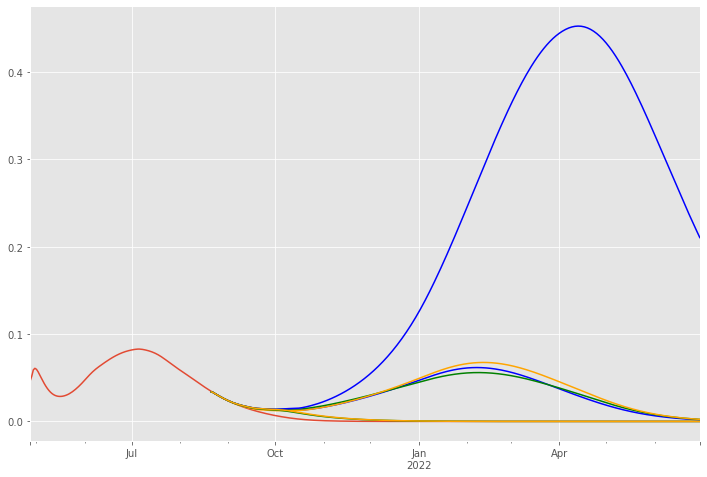

In [19]:
sc_colors = ["blue", "green", "orange"] * 2 

for output in outputs:
    fig = plt.figure(figsize=(12, 8))
    plt.style.use("ggplot")
    axis = fig.add_subplot()
    axis = derived_df[output].plot()
    
    for i, d in enumerate(derived_dfs):
        if output in d.columns:
            d[output].plot(color=sc_colors[i])
    
    # axis.vlines(x=pd.Timestamp("2021-11-01"), ymin=0, ymax=max(d[output]), color="black", linestyle="dashed")
    axis.set_xlim((pd.Timestamp("2021-09-01"), pd.Timestamp("2022-06-01")))
    axis.set_ylabel(output.replace("_", " "), fontsize=15)

# Cumulative TTS calculations

In [ ]:
diff_output = {}
for output in ["incidence", "hospital_admissions", "icu_admissions",  "infection_deaths"]:
    cum_output = [sum(d[output]) for d in derived_dfs]
    diff_output[output] = cum_output[0] - cum_output[1]

In [ ]:
[ print(f"{name}: {round(value)}") for name, value in diff_output.items()]


In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.style.use("ggplot")
axis = fig.add_subplot()

xticks_vals, xticks_labs = [], []
for i, output in enumerate(list(diff_output.keys())):
    val = diff_output[output]
    col = "coral"
    pref = ""
    if output.startswith("tts"):
        col = "blueviolet"
    else:
        pref = "adverted "
        
    axis.hlines(y=-i, xmin=0, xmax=val, linewidth=20, color=col)
    axis.text(x=1.2 * val, y=-i, s=round(val))
    
    
    xticks_vals.append(-i)
    xticks_labs.append(pref + output.replace("_", " "))

axis.set_xscale('log')
axis.set_xlabel("log(N)")
plt.yticks(xticks_vals,xticks_labs, fontsize=13)
plt.show()